In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Proba

In [26]:
left_PCS_pred_dim256 = pd.read_csv('/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Heritability/data/HCP_prob_pred_left_PCS.csv')
right_PCS_pred_dim256 = pd.read_csv('/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Heritability/data/HCP_prob_pred_PCS.csv')

left_PCS_pred_dim10 = pd.read_csv('/neurospin/dico/adufournet/Runs/05_Heritability_Left_PCS_HCP_dim10/Heritability/data/HCP_prob_pred_left_PCS.csv')
right_PCS_pred_dim10 = pd.read_csv('/neurospin/dico/adufournet/Runs/04_Heritability_Right_PCS_HCP_dim10/Heritability/data/HCP_prob_pred_PCS.csv')

In [27]:
left_PCS_pred_dim256.head()

,IID,Pred
0,100206,0.300419
1,100307,0.637499
2,100408,0.809765
3,100610,0.368842
4,101006,0.208543


In [28]:
left_PCS_pred_dim10.head()

,IID,Pred
0,100206,0.400173
1,100307,0.790705
2,100408,0.679147
3,100610,0.284820
4,101006,0.281036


In [29]:
LeftPCS = pd.merge(left_PCS_pred_dim256, left_PCS_pred_dim10, how='inner', on='IID', suffixes=[256,10])
LeftPCS

,IID,Pred256,Pred10
0,100206,0.300419,0.400173
1,100307,0.637499,0.790705
2,100408,0.809765,0.679147
3,100610,0.368842,0.284820
4,101006,0.208543,0.281036
...,...,...,...
1109,992774,0.610070,0.161840
1110,993675,0.617694,0.714834
1111,994273,0.590405,0.514332
1112,995174,0.688845,0.691343


In [30]:
LeftPCS.drop('IID', axis=1).corr()

,Pred256,Pred10
Pred256,1.0000,0.8263
Pred10,0.8263,1.0000


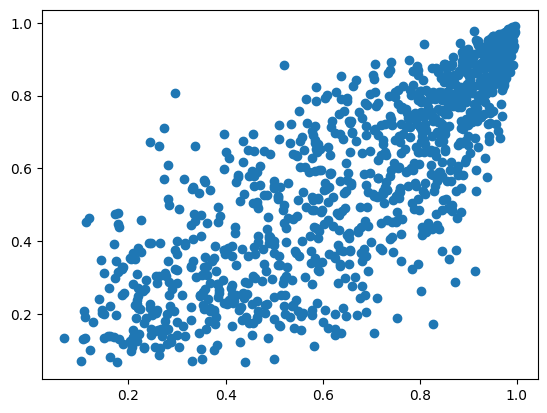

In [31]:
plt.scatter(LeftPCS['Pred256'], LeftPCS['Pred10'])
plt.xlabel('PCS predicted (probability) from model 1')
plt.ylabel('PCS predicted (probability) from model 2')
plt.title('Comparison of two embedded space of dim 256 and 10')
plt.show()

In [32]:
pd.read_csv('/neurospin/dico/adufournet/Runs/05_Heritability_Left_PCS_HCP_dim10/Heritability/wdir/pedigree.csv')

,ID,HCP_FID,MO,FA,SEX,MZTWIN,FAMID
0,100004,52259_82122,52259,82122,M,0,52259082122
1,100206,56037_85858,56037,85858,M,0,56037085858
2,100307,51488_81352,51488,81352,F,1,51488081352
3,100408,51730_81594,51730,81594,M,2,51730081594
4,100610,52813_82634,52813,82634,M,0,52813082634
...,...,...,...,...,...,...,...
1201,992774,51345_81210,51345,81210,M,0,51345081210
1202,993675,55800_85621,55800,85621,F,0,55800085621
1203,994273,52364_82227,52364,82227,M,0,52364082227
1204,995174,55923_85743,55923,85743,M,116,55923085743


## Binary

In [33]:
left_PCS_pred_dim256 = pd.read_csv('/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Heritability/data/HCP_binary_pred_left_PCS.csv')
right_PCS_pred_dim256 = pd.read_csv('/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Heritability/data/HCP_binary_pred_PCS.csv')

left_PCS_pred_dim10 = pd.read_csv('/neurospin/dico/adufournet/Runs/05_Heritability_Left_PCS_HCP_dim10/Heritability/data/HCP_binary_pred_left_PCS.csv')
right_PCS_pred_dim10 = pd.read_csv('/neurospin/dico/adufournet/Runs/04_Heritability_Right_PCS_HCP_dim10/Heritability/data/HCP_binary_pred_PCS.csv')

In [34]:
(left_PCS_pred_dim256['Pred'] == left_PCS_pred_dim10['Pred']).sum()/len(left_PCS_pred_dim10['Pred'])

0.7971274685816876

### Test SOLAR with binary height

In [37]:
Height = pd.read_csv('/neurospin/dico/adufournet/Error/Height.csv')

In [42]:
import statistics 

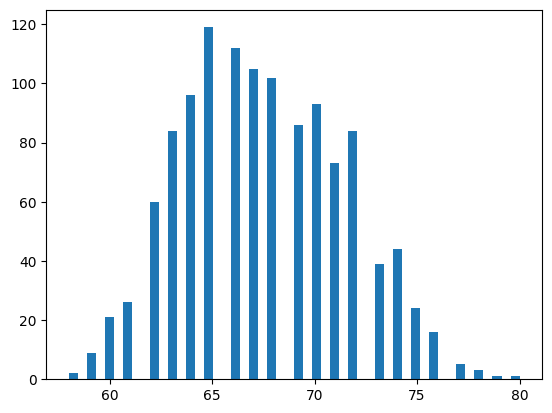

In [46]:
plt.hist(Height['Height'], bins=50)
plt.show()

In [45]:
statistics.median(Height['Height'])

66.0

In [53]:
Height['Binary_height'] = (Height['Height'] >= statistics.median(Height['Height'])).astype(int)

In [54]:
Height

,IID,Height,Binary_height
0,100004,72.0,1
1,100206,71.0,1
2,100307,65.0,0
3,100408,76.0,1
4,100610,69.0,1
...,...,...,...
1201,992774,67.0,1
1202,993675,63.0,0
1203,994273,75.0,1
1204,995174,68.0,1


In [55]:
Height.to_csv('/neurospin/dico/adufournet/Error/Height.csv', index=False)